<a href="https://colab.research.google.com/github/kevin-salazar/computacionGrafica/blob/master/3Dstereo/3Dstereo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes**

- Raúl Quispe

- Kevin Salazar

**Video**

[Ver video](https://drive.google.com/open?id=148iBAWhNORa6uIEKe-8jgDU7a78ywody)

**Carpetas**

[Ver archivos](https://drive.google.com/drive/folders/1dUZ2JQozZGPFPeezICLpGXP_qmqd0tki?usp=sharing)

**Resultados:**

![texto alternativo](https://github.com/kevin-salazar/computacionGrafica/raw/master/tacho1.jpg)
![texto alternativo](https://github.com/kevin-salazar/computacionGrafica/raw/master/tacho2.jpg)
![texto alternativo](https://github.com/kevin-salazar/computacionGrafica/raw/master/add.png)
![texto alternativo](https://github.com/kevin-salazar/computacionGrafica/raw/master/dsd.png)
![texto alternativo](https://github.com/kevin-salazar/computacionGrafica/raw/master/sombrero1.jpg)
![texto alternativo](https://github.com/kevin-salazar/computacionGrafica/raw/master/sombrero2.jpg)
![texto alternativo](https://github.com/kevin-salazar/computacionGrafica/raw/master/som.png)

# Cargar datos para calibrar camara

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/3DReconstruction/tableroFotos'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
20191219_093627.jpg  20191219_093737.jpg  20191219_093858.jpg
20191219_093633.jpg  20191219_093742.jpg  20191219_093913.jpg
20191219_093641.jpg  20191219_093801.jpg  20191219_093924.jpg
20191219_093648.jpg  20191219_093808.jpg  20191219_093942.jpg
20191219_093658.jpg  20191219_093816.jpg  20191219_094026.jpg
20191219_093705.jpg  20191219_093826.jpg  20191219_094039.jpg
20191219_093713.jpg  20191219_093834.jpg  20191219_094055.jpg
20191219_093725.jpg  20191219_

## Camera Calibration


In [0]:
PATH="/content/drive/My Drive/3DReconstruction/"

In [0]:

import cv2
import numpy as np
import PIL.ExifTags
import PIL.Image
from tqdm import tqdm
import glob

objPoints = [] 
imgPoints = []
sizeChessboard = (6,9)

objp = np.zeros((np.prod(sizeChessboard),3),dtype=np.float32)

objp[:,:2] = np.mgrid[0:sizeChessboard[0], 0:sizeChessboard[1]].T.reshape(-1,2)

calibration_paths = glob.glob(PATH+'tableroFotos/*')

for image_path in tqdm(calibration_paths):

	image = cv2.imread(image_path)
	gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	print("Ok...")

	ret,corners = cv2.findChessboardCorners(gray_image, sizeChessboard, None)

	if ret == True:
		print("Tablero ok")
		print(image_path)

		criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

		cv2.cornerSubPix(gray_image, corners, (5,5), (-1,-1), criteria)
		objPoints.append(objp)
		imgPoints.append(corners)

ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints,gray_image.shape[::-1], None, None)

np.save(PATH+'parametrosCamara/ret', ret)
np.save(PATH+'parametrosCamara/K', K)
np.save(PATH+'parametrosCamara/dist', dist)
np.save(PATH+'parametrosCamara/rvecs', rvecs)
np.save(PATH+'parametrosCamara/tvecs', tvecs)

exif_img = PIL.Image.open(calibration_paths[0])

exif_data = {
	PIL.ExifTags.TAGS[k]:v
	for k, v in exif_img._getexif().items()
	if k in PIL.ExifTags.TAGS}

focal_length_exif = exif_data['FocalLength']

focal_length = focal_length_exif[0]/focal_length_exif[1]

np.save(PATH+'parametrosCamara/FocalLength', focal_length)

mean_error = 0
for i in range(len(objPoints)):
	imgPoints2, _ = cv2.projectPoints(objPoints[i],rvecs[i],tvecs[i], K, dist)
	error = cv2.norm(imgPoints[i], imgPoints2, cv2.NORM_L2)/len(imgPoints2)
	mean_error += error

total_error = mean_error/len(objPoints)
print ("Error total:", total_error)

  4%|▍         | 1/24 [00:00<00:03,  7.37it/s]

Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_094106.jpg
Ok...


 12%|█▎        | 3/24 [00:00<00:05,  4.05it/s]

Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_094055.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_094039.jpg
Ok...


 21%|██        | 5/24 [00:01<00:03,  5.50it/s]

Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_094026.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093942.jpg
Ok...


 29%|██▉       | 7/24 [00:01<00:02,  6.30it/s]

Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093924.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093913.jpg


 33%|███▎      | 8/24 [00:01<00:02,  6.59it/s]

Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093858.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093843.jpg


 46%|████▌     | 11/24 [00:01<00:01,  7.75it/s]

Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093834.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093826.jpg
Ok...


 54%|█████▍    | 13/24 [00:03<00:04,  2.36it/s]

Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093816.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093808.jpg
Ok...


 62%|██████▎   | 15/24 [00:03<00:02,  3.80it/s]

Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093801.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093742.jpg
Ok...


 67%|██████▋   | 16/24 [00:04<00:02,  3.21it/s]

Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093737.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093725.jpg
Ok...


 79%|███████▉  | 19/24 [00:05<00:01,  3.88it/s]

Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093713.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093705.jpg
Ok...


 88%|████████▊ | 21/24 [00:05<00:00,  5.48it/s]

Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093658.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093648.jpg
Ok...


100%|██████████| 24/24 [00:05<00:00,  4.45it/s]

Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093641.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093633.jpg
Ok...
Tablero ok
/content/drive/My Drive/3DReconstruction/tableroFotos/20191219_093627.jpg


Error total: 0.09610082823998435


## Epipolar Geometry


In [0]:
'''
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread(PATH+'reconstruct_this/image1.png',0)  #queryimage # left image
img2 = cv.imread(PATH+'reconstruct_this/image1.png',0) #trainimage # right image
#sift = cv.SIFT()
sift = cv2.xfeatures2d.SURF_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []
pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)
'''

![texto alternativo](https://docs.opencv.org/3.4.4/epipolar.jpg)


## Reconstruccion 3D

In [0]:
ret = np.load ('./ camera_params / ret.npy') 
K = np.load ('./ camera_params /K. / dist.npy ')
dist = np.load (' ./ camera_params / dist.npy ') 
img_path1 =PATH+'stereoFotos/tacho1.jpg'
img_path2 =PATH+'stereoFotos/tacho2.jpg' 

img_1 = cv2.imread (img_path1) 
img_2 = cv2.imread (img_path2) 

h, w = img_2.shape [: 2]

Populating the interactive namespace from numpy and matplotlib


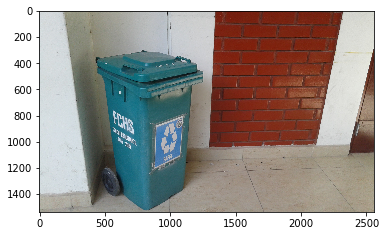

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(PATH+'stereoFotos/tacho1.jpg')
imgplot = plt.imshow(img)
plt.show()

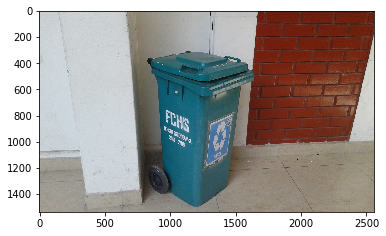

In [0]:
img=mpimg.imread(PATH+'stereoFotos/tacho2.jpg')
imgplot = plt.imshow(img)
plt.show()

##Calculo de  una matriz de cámara óptima

In [0]:
new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix (K, dist, (w, h), 1, (w, h)) 

img_1_undistorted = cv2.undistort (img_1, K, dist, None , new_camera_matrix) 
img_2_undistorted = cv2.undistort (img_2, K, dist, None, new_camera_matrix) 

img_1_downsampled = downsample_image (img_1_undistorted, 3) 
imgim2__fund_2_imple_2_imple_2_implemento

# imagen distorcinado
![texto alternativo](https://answers.opencv.org/upfiles/14824434582135701.png)

#  Distorsión radial
![texto alternativo](https://answers.opencv.org/upfiles/14824441376560293.png)

getOptimalNewCameraMatrix se usa para usar diferentes resoluciones de la misma cámara con la misma calibración.

#Algoritmo de coencidencia de caracteristicas(SGBM)
![texto alternativo](https://www.mathworks.com/help/examples/visionhdl/win64/xxSGBM_DisparityLevels.png)
En opencv hay dos algoritmos :
1. Stereo BM (Para imagenes de alta textura )
2. coincidencia de bloques semi global (SGBM).(para texturas suaves)


Nosotros estamos usando (SGBM)

Algoritmo: 

1.Imagen de prefiltro para normalizar el brillo y mejorar la textura

2.Búsqueda de correspondencia a lo largo de líneas epipolares horizontales 

3.Postfiltrado para eliminar coincidencias de correspondencia incorrecta.




## Geometria epipolar
Ejemplo
![texto alternativo](https://miro.medium.com/max/606/1*AtZfO8s0FJGesob9n4ZDLg.png)



Algoritmo
![texto alternativo](https://docs.opencv.org/3.4.4/epipolar.jpg)

![texto alternativo](https://docs.opencv.org/3.4.4/epiresult.jpg)

el algoritmo SGBM las atravesará las lineas para  encontrar las coincidencias.

### Tolerancia de disparidad(desplazamiento):
![texto alternativo](https://miro.medium.com/max/438/1*x4n2IDrw-jTK6LhwYKKs2w.png)





In [0]:
win_size = 5 
min_disp = -1 
max_disp = 63 
num_disp = max_disp - min_disp  

estéreo = cv2.StereoSGBM_create (minDisparity = min_disp, 
numDisparities = num_disp, 
blockSize = 5, 
uniquenessRatio = 5, 
speckleWindowSize = 5, 
speckleRange = 5, 
disp12MaxDiff = 1, 
P1 = 8 * 3 * win_size ** 2,  
P2 = 32 * 3 * win_size ** 2) 

print ("\ nCálculo del mapa de disparidad ...")
disparity_map = stereo.compute(img_1_downsampled, img_2_downsampled) 

plt.imshow (disparity_map, 'gris') 
plt.show ()

![texto alternativo](https://miro.medium.com/max/640/1*02geaHT0XiV-ZF_xn2qiTA.png)


# Obtener Matriz de color
![texto alternativo](https://miro.medium.com/max/1798/1*Md2qr12VE-nUeqaZ06Xmaw.png)
 Esta matriz es la responsable de reproyectar la profundidad y los colores en el espacio 3D.

In [0]:
print ("\ nGenerando el mapa 3D ...") 
h, w = img_2_downsampled.shape [: 2] 

focal_length = np.load ('./ camera_params / FocalLength.npy') 
Q = np.float32 ([[1,0,0, -w / 2.0], 
    [0, -1,0, h / 2.0], 
    [0,0,0, -focal_length], 
    [0,0,1 , 0]]) 
 Q2 = np.float32 ([[1,0,0,0],
    [0, -1,0,0], 
    [0,0, focal_length * 0.05,0], # Multiplicación de longitud focal obtenida experimentalmente. 
    [0,0,0,1]]) 
3D_3D = cv2.reprojectImageTo3D (disparity_map, Q2) 

colores = cv2.cvtColor (img_1_downsampled, cv2.COLOR_BGR2RGB) 
mask_map = disparity_map> disparity_map.min () 
output_points = points_3D [mask_map] 
output_colors = colors [mask_map] 
output_file = 'reconstructed.ply' 
print ("\ n Creando el archivo de salida ... \ n") 
create_output (output_points, output_colors , archivo de salida)

## Codigo Final


Computing the disparity  map...


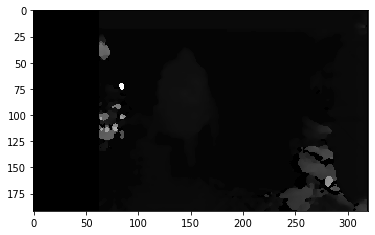


Generating the 3D map...

 Creating the output file... 



In [0]:
import cv2
import numpy as np 
import glob
from tqdm import tqdm
import PIL.ExifTags
import PIL.Image
from matplotlib import pyplot as plt 
def create_output(vertices, colors, filename):
	colors = colors.reshape(-1,3)
	vertices = np.hstack([vertices.reshape(-1,3),colors])

	ply_header = '''ply
		format ascii 1.0
		element vertex %(vert_num)d
		property float x
		property float y
		property float z
		property uchar red
		property uchar green
		property uchar blue
		end_header
		'''
	with open(filename, 'w') as f:
		f.write(ply_header %dict(vert_num=len(vertices)))
		np.savetxt(f,vertices,'%f %f %f %d %d %d')

def downsample_image(image, reduce_factor):
	for i in range(0,reduce_factor):
		if len(image.shape) > 2:
			row,col = image.shape[:2]
		else:
			row,col = image.shape

		image = cv2.pyrDown(image, dstsize= (col//2, row // 2))
	return image

ret = np.load(PATH+'parametrosCamara/ret.npy')
K = np.load(PATH+'parametrosCamara/K.npy')
dist = np.load(PATH+'parametrosCamara/dist.npy')

img_path1 = PATH+'stereoFotos/mochilaL.jpg'
img_path2 = PATH+'stereoFotos/mochilaR.jpg'

img_1 = cv2.imread(img_path1)
img_2 = cv2.imread(img_path2)

h,w = img_2.shape[:2]

new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(K,dist,(w,h),1,(w,h))

img_1_undistorted = cv2.undistort(img_1, K, dist, None, new_camera_matrix)
img_2_undistorted = cv2.undistort(img_2, K, dist, None, new_camera_matrix)

img_1_downsampled = downsample_image(img_1_undistorted,3)
img_2_downsampled = downsample_image(img_2_undistorted,3)



win_size = 5
min_disp = -1
max_disp = 63 #min_disp * 9
num_disp = max_disp - min_disp # Needs to be divisible by 16

stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
	numDisparities = num_disp,
	blockSize = 5,
	uniquenessRatio = 5,
	speckleWindowSize = 5,
	speckleRange = 5,
	disp12MaxDiff = 2,
	P1 = 8*3*win_size**2,#8*3*win_size**2,
	P2 =32*3*win_size**2) #32*3*win_size**2)

print ("\nComputing the disparity  map...")
disparity_map = stereo.compute(img_1_downsampled, img_2_downsampled)

plt.imshow(disparity_map,'gray')
plt.show()

print ("\nGenerating the 3D map...")

h,w = img_2_downsampled.shape[:2]

focal_length = np.load(PATH+'parametrosCamara/FocalLength.npy')

Q = np.float32([[1,0,0,-w/2.0],
				[0,-1,0,h/2.0],
				[0,0,0,-focal_length],
				[0,0,1,0]])

Q2 = np.float32([[1,0,0,0],
				[0,-1,0,0],
				[0,0,focal_length*0.05,0], #Focal length multiplication obtained experimentally. 
				[0,0,0,1]])

points_3D = cv2.reprojectImageTo3D(disparity_map, Q2)
colors = cv2.cvtColor(img_1_downsampled, cv2.COLOR_BGR2RGB)

mask_map = disparity_map > disparity_map.min()

output_points = points_3D[mask_map]
output_colors = colors[mask_map]

output_file = 'reconstructed.ply'

print("\n Creating the output file... \n")
create_output(output_points, output_colors, output_file)